In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sms
import statsmodels.formula.api as smsformula
from statsmodels.formula.api import ols #Creating Anova Table
from statsmodels.stats.multicomp import pairwise_tukeyhsd
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

pd.set_option("display.max_columns", 500)

In [2]:
credit = pd.read_csv("Credit-Card-Dataset.csv")

In [3]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


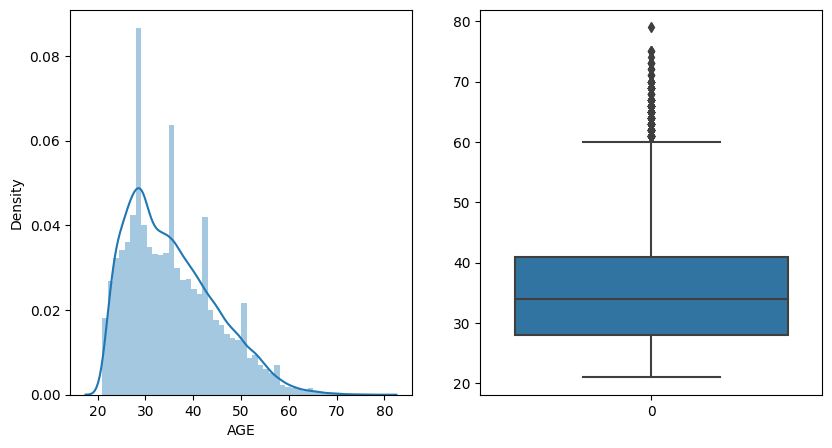

In [4]:
#This is a continuous variable figure size
plt.figure(figsize = (15,5))

#distribution plot
plt.subplot(1,3,1) #subplot
sns.distplot(credit['AGE'])

#Boxplot
plt.subplot(1,3,2)
sns.boxplot(credit['AGE'])
plt.show()

In [5]:
#Description of the column
credit['AGE'].describe(percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99])

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
10%         25.000000
20%         27.000000
25%         28.000000
30%         29.000000
40%         31.000000
50%         34.000000
60%         37.000000
70%         40.000000
75%         41.000000
80%         43.000000
90%         49.000000
99%         60.000000
max         79.000000
Name: AGE, dtype: float64

In [6]:
credit['AGE'].skew(), credit['AGE'].kurt() #Skewness essentially is a commonly used measure in descriptive statistics 
                                           #that characterizes the asymmetry of a data distribution, 
                                           #while kurtosis determines the heaviness of the distribution tails

(0.7322458687830562, 0.04430337823580954)

0.47924232857778376


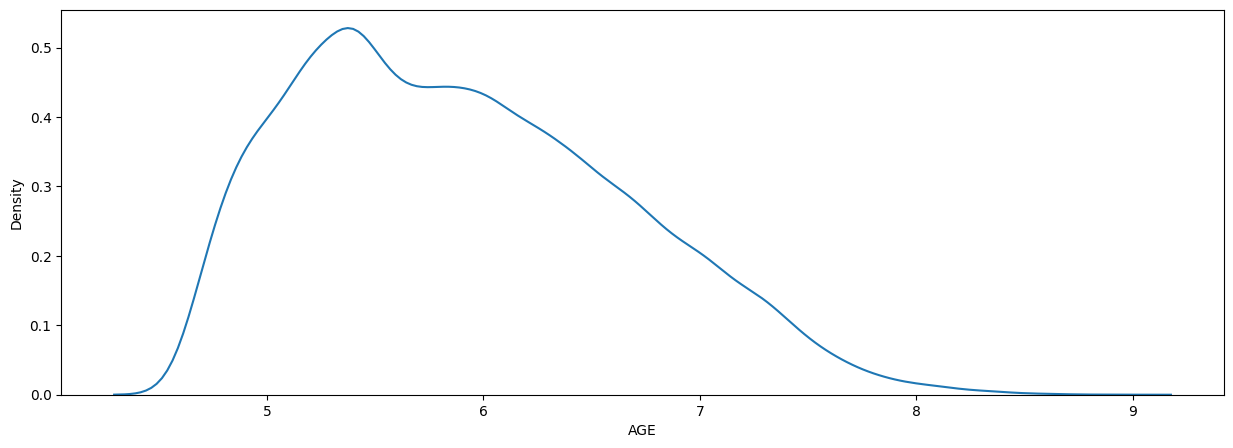

In [7]:
#Using sqrt
print(np.sqrt(credit['AGE']).skew())
plt.figure(figsize = (15,5))
sns.distplot(np.sqrt(credit['AGE']), hist = False)
plt.show()

0.2892635438926005


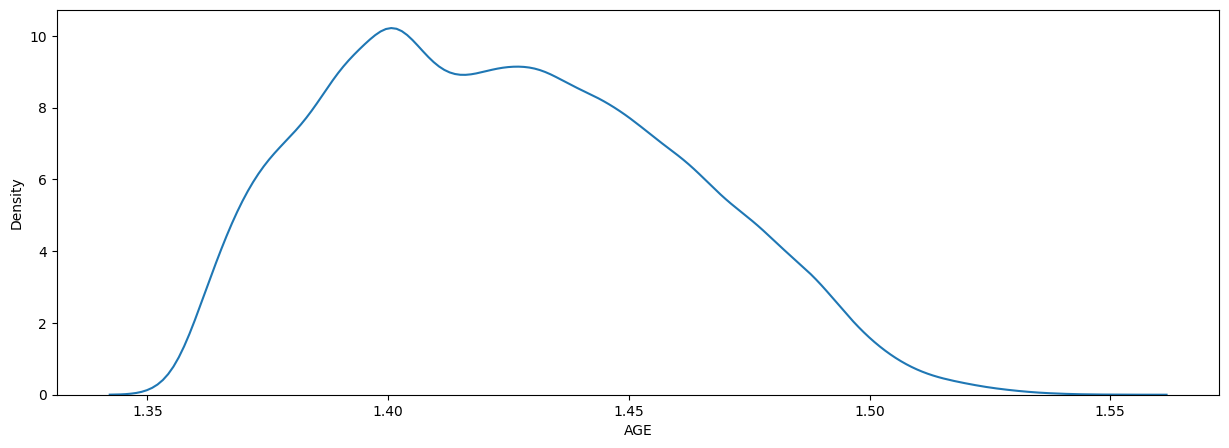

In [8]:
#Using root of 10
print((credit['AGE']**0.1).skew())
plt.figure(figsize = (15,5))
sns.distplot((credit['AGE']**0.1), hist = False)
plt.show()

0.2432331618785198


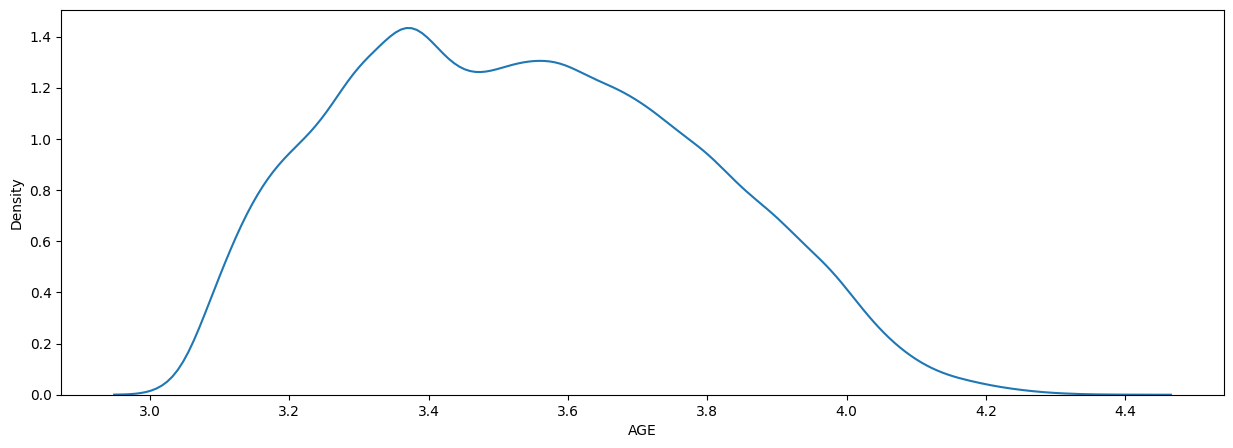

In [9]:
#Using log transformation
print(np.log(credit['AGE']).skew())
plt.figure(figsize = (15,5))
sns.distplot(np.log(credit['AGE']), hist = False)
plt.show()

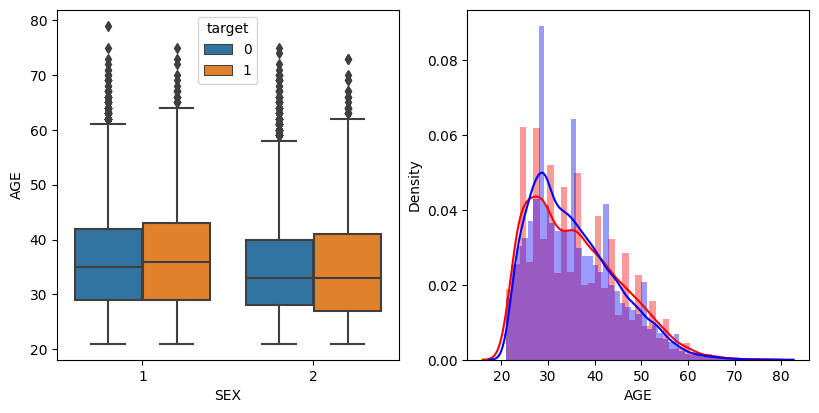

In [10]:
#This is a continuous variable figure size
plt.figure(figsize = (15,10))

plt.subplot(2,3,1)
sns.boxplot(x = credit['SEX'], y = credit['AGE'], hue = credit['target'])

plt.subplot(2,3,2)
sns.distplot(credit[credit['target'] == 1]['AGE'], color = 'r', label = '1')
sns.distplot(credit[credit['target'] == 0]['AGE'], color = 'b', label = '0')
plt.show()

In [11]:
credit.groupby('target')['AGE'].describe(percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99])

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
target,,,,,,,,,,,,,,,,,
0,23364.0,35.417266,9.077355,21.0,25.0,27.0,28.0,29.0,31.0,34.0,36.0,39.0,41.0,43.0,48.0,60.0,79.0
1,6636.0,35.725738,9.693438,21.0,24.0,27.0,28.0,29.0,31.0,34.0,37.0,40.0,42.0,44.0,50.0,61.0,75.0


In [12]:
credit.groupby(['target','SEX'])['AGE'].describe(percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99])

count       mean       std   min   10%   20%   25%   30%   40%  \
target SEX                                                                     
0      1     9015.0  36.428619  9.312213  21.0  26.0  28.0  29.0  30.0  32.0   
       2    14349.0  34.781866  8.868165  21.0  25.0  27.0  28.0  29.0  31.0   
1      1     2873.0  36.804386  9.684725  21.0  25.0  28.0  29.0  30.0  33.0   
       2     3763.0  34.902206  9.620276  21.0  24.0  26.0  27.0  28.0  30.0   

             50%   60%   70%   75%   80%   90%   99%   max  
target SEX                                                  
0      1    35.0  38.0  41.0  42.0  44.0  50.0  62.0  79.0  
       2    33.0  36.0  39.0  40.0  42.0  48.0  58.0  75.0  
1      1    36.0  38.0  41.0  43.0  45.6  51.0  61.0  75.0  
       2    33.0  36.0  39.4  41.0  43.0  49.0  60.0  73.0

In [13]:
group1 = credit[credit['target'] == 1]
group1 = group1['AGE']

group2 = credit[credit['target'] == 0]
group2 = group2['AGE']

In [14]:
from scipy.stats import ttest_ind

In [15]:
t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)

2.40594177499625 0.016136845890163832


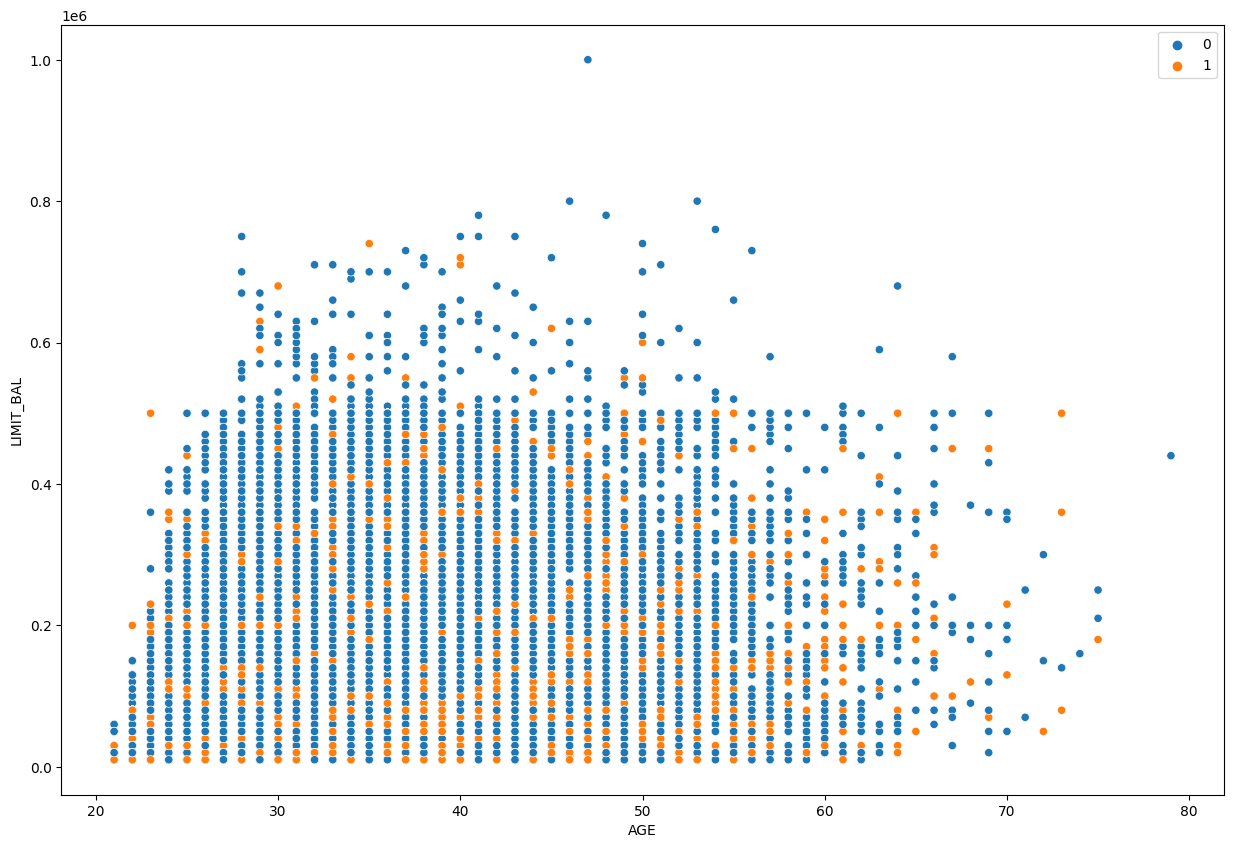

In [16]:
#figure size
plt.figure(figsize = (15,10))

#distribution plot
#plt.subplot(2,3,1)
sns.scatterplot(x = credit['AGE'], y = credit['LIMIT_BAL'], hue = credit['target'])
plt.legend()
plt.show()

In [17]:
#Correlation coefficient
credit['AGE'].corr(credit['LIMIT_BAL'])

0.14471279755733582

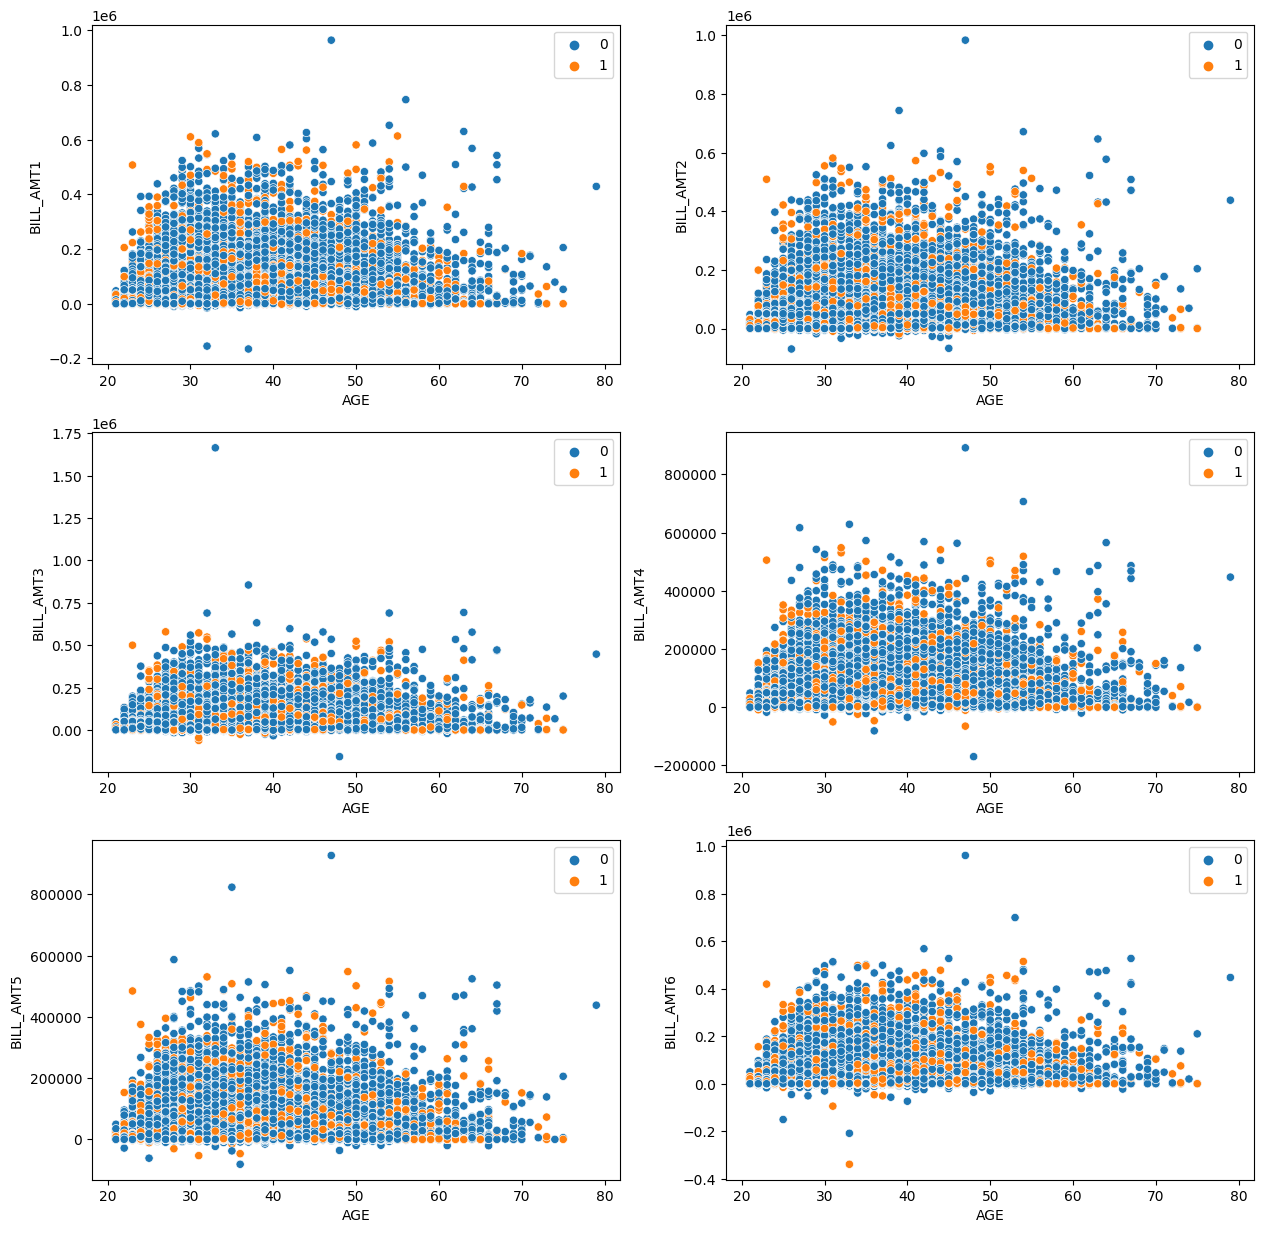

In [18]:
#figure size
plt.figure(figsize = (15,15))

#distribution plot
plt.subplot(3,2,1)  #subplot
sns.scatterplot(x = credit['AGE'], y = credit['BILL_AMT1'], hue = credit['target'])
plt.legend()
plt.subplot(3,2,2)  #subplot
sns.scatterplot(x = credit['AGE'], y = credit['BILL_AMT2'], hue = credit['target'])
plt.legend()
plt.subplot(3,2,3)  #subplot
sns.scatterplot(x = credit['AGE'], y = credit['BILL_AMT3'], hue = credit['target'])
plt.legend()
plt.subplot(3,2,4)  #subplot
sns.scatterplot(x = credit['AGE'], y = credit['BILL_AMT4'], hue = credit['target'])
plt.legend()
plt.subplot(3,2,5)  #subplot
sns.scatterplot(x = credit['AGE'], y = credit['BILL_AMT5'], hue = credit['target'])
plt.legend()
plt.subplot(3,2,6)  #subplot
sns.scatterplot(x = credit['AGE'], y = credit['BILL_AMT6'], hue = credit['target'])
plt.legend()
plt.show()

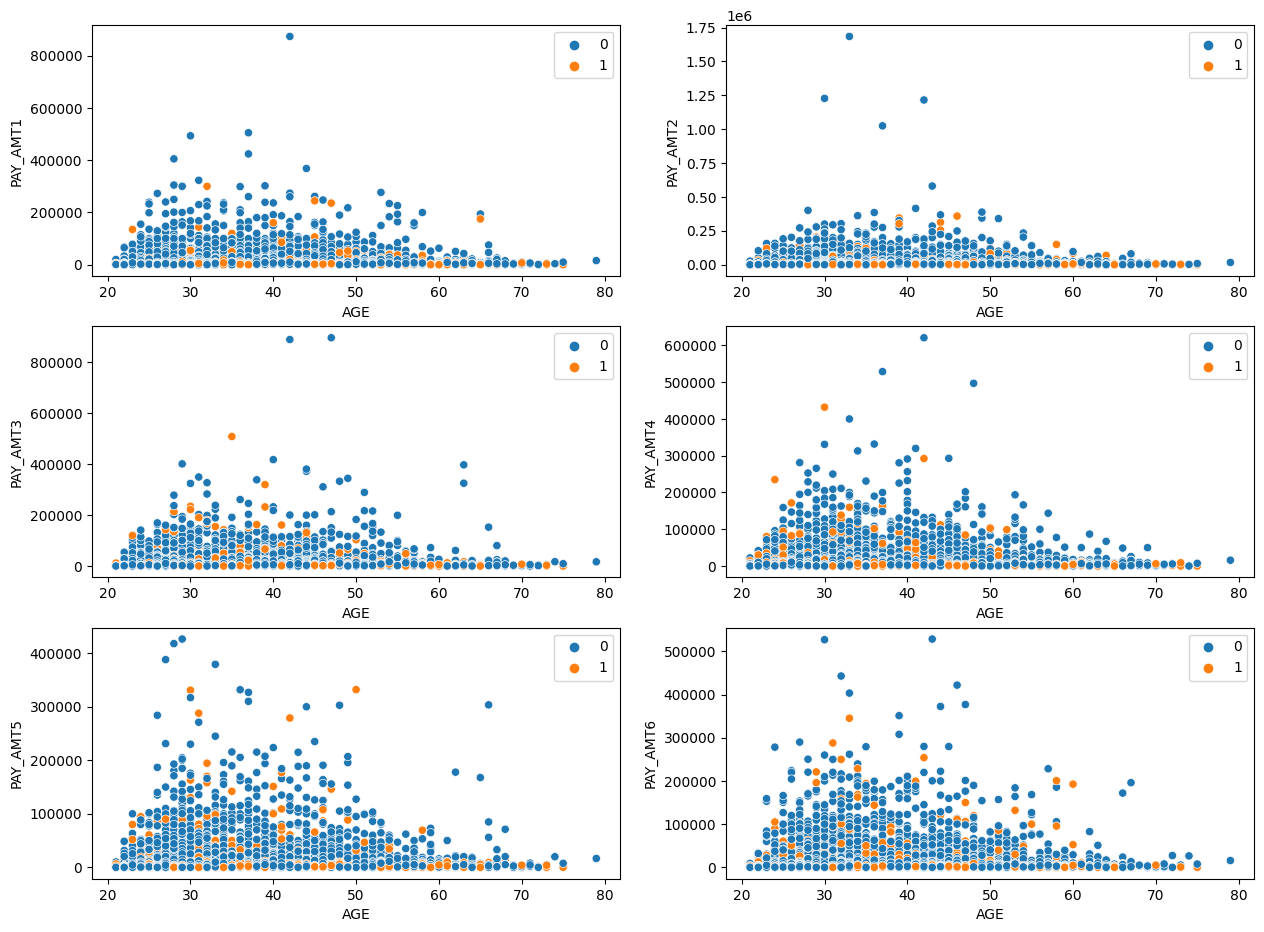

In [19]:
#figure size
plt.figure(figsize = (15,15))

#distribution plot
plt.subplot(4,2,1)  #subplot
sns.scatterplot(x = credit['AGE'], y = credit['PAY_AMT1'], hue = credit['target'])
plt.legend()
plt.subplot(4,2,2)  #subplot
sns.scatterplot(x = credit['AGE'], y = credit['PAY_AMT2'], hue = credit['target'])
plt.legend()
plt.subplot(4,2,3)  #subplot
sns.scatterplot(x = credit['AGE'], y = credit['PAY_AMT3'], hue = credit['target'])
plt.legend()
plt.subplot(4,2,4)  #subplot
sns.scatterplot(x = credit['AGE'], y = credit['PAY_AMT4'], hue = credit['target'])
plt.legend()
plt.subplot(4,2,5)  #subplot
sns.scatterplot(x = credit['AGE'], y = credit['PAY_AMT5'], hue = credit['target'])
plt.legend()
plt.subplot(4,2,6)  #subplot
sns.scatterplot(x = credit['AGE'], y = credit['PAY_AMT6'], hue = credit['target'])
plt.legend()
plt.show()

In [20]:
credit['AGE_CAT'] = pd.cut(credit['AGE'], bins = [0,25,34,44,100],labels = ["0-25","26-34","35-44","44+"])
pd.crosstab(credit.AGE_CAT,credit.target)

target,0,1
AGE_CAT,,
0-25,2839,1032
26-34,9486,2339
35-44,7047,1971
44+,3992,1294


In [21]:
from sklearn.model_selection import train_test_split  # to split the data into two parts
from sklearn.linear_model import LogisticRegression  # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold  # for cross validation
from sklearn.model_selection import GridSearchCV  # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search for hyper parameters
from sklearn.preprocessing import StandardScaler  # for normalization

In [22]:
credit = credit.drop('AGE_CAT', axis = 1)
credit = credit.drop('ID', axis = 1)

In [23]:
credit['SEX'] = pd.Categorical(credit['SEX'])
credit['SEX'] = credit.SEX.cat.codes
credit['MARRIAGE'] = pd.Categorical(credit['MARRIAGE'])
credit['MARRIAGE'] = credit.MARRIAGE.cat.codes
credit['EDUCATION'] = pd.Categorical(credit['EDUCATION'])
credit['EDUCATION'] = credit.EDUCATION.cat.codes

In [24]:
X = credit.drop('target', axis = 1)
y = credit['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [25]:
#Supporting features
y = credit.target    # default = 1 or non-default = 0
features = credit.drop('target', axis = 1, inplace = False)

features.SEX = pd.Categorical(features['SEX'])
features['SEX'] = features.SEX.cat.codes
features['MARRIAGE'] = pd.Categorical(features['MARRIAGE'])
features['MARRIAGE'] = features.MARRIAGE.cat.codes
features['EDUCATION'] = pd.Categorical(features['EDUCATION'])
features['EDUCATION'] = features.EDUCATION.cat.codes
features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,1,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,1,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,1,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,1,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,0,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [26]:
stdX = (features - features.mean())/(features.std())
stdX.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136701,0.810147,0.185825,-1.057277,-1.245999,1.794534,1.782318,-0.696652,-0.666588,-1.530021,-1.486016,-0.642490,-0.647388,-0.667982,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,-0.296796,-0.308057,-0.314131,-0.293377
1,-0.365974,0.810147,0.185825,0.858543,-1.029030,-0.874977,1.782318,0.138862,0.188743,0.234913,1.992282,-0.659208,-0.666735,-0.639244,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,-0.240001,-0.244226,-0.314131,-0.180875
2,-0.597192,0.810147,0.185825,0.858543,-0.161154,0.014860,0.111734,0.138862,0.188743,0.234913,0.253133,-0.298555,-0.493891,-0.482400,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,-0.240001,-0.244226,-0.248679,-0.012122
3,-0.905483,0.810147,0.185825,-1.057277,0.164300,0.014860,0.111734,0.138862,0.188743,0.234913,0.253133,-0.057490,-0.013292,0.032846,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,-0.228641,-0.237842,-0.244162,-0.237126
4,-0.905483,-1.234302,0.185825,-1.057277,2.333990,-0.874977,0.111734,-0.696652,0.188743,0.234913,0.253133,-0.578608,-0.611308,-0.161186,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,0.271161,0.266429,-0.269034,-0.255183


In [27]:
# Dataset with standardized features
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(stdX, y, test_size = 0.2, stratify = y, random_state = 42)

In [28]:
model = LogisticRegression()
rfe_stand = RFE(model)
fit_stand = rfe_stand.fit(stdX, y)
print("Std Model Feature Ranking : ", fit_stand.ranking_)

#calculate the score for the selected features
score_stand = rfe_stand.score(stdX, y)
print("Standardized Model Score with selected features is :  %f (%f)" % (score_stand.mean(), score_stand.std()))

Std Model Feature Ranking :  [ 1  7  1  1  2  1  1  1 10  3 13  1  1  1 12  5 11  1  1  6  4  8  9]
Standardized Model Score with selected features is :  0.810133 (0.000000)


In [29]:
feature_names = np.array(features.columns)
print('Most important features(RFE) : %s' % feature_names[rfe_stand.support_])

Most important features(RFE) : ['LIMIT_BAL' 'EDUCATION' 'MARRIAGE' 'PAY_0' 'PAY_2' 'PAY_3' 'BILL_AMT1'
 'BILL_AMT2' 'BILL_AMT3' 'PAY_AMT1' 'PAY_AMT2']


In [30]:
Ximp = stdX[['LIMIT_BAL','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1',
             'PAY_AMT2']]
X_tr, X_t, y_tr, y_t = train_test_split(Ximp, y, test_size = 0.2, stratify = y, random_state = 42)

In [31]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [32]:
# Setup the hyperparameter grid (not scaled data)
param_grid = {'C': np.logspace(-4, 6, 10)}

# Instantiate a Logistic Regression Classifier
logreg = LogisticRegression()

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, param_grid, cv = 3, random_state = 0)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters : {}".format(logreg_cv.best_params_))

Tuned Logistic Regression Parameters : {'C': 0.0001}


Accuracy :  0.7788333333333334

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000


Average 5-Fold CV Score : 0.7788 Standard Deviation : 0.0001


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

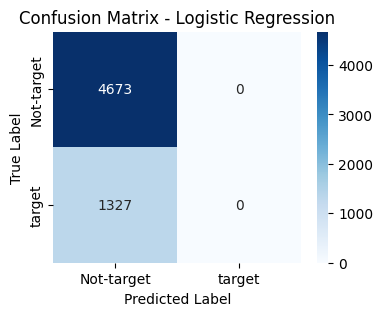

In [33]:
LR = LogisticRegression(C = 0.081, random_state = 0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy : ', metrics.accuracy_score(y_pred, y_test))
cv_scores = cross_val_score(LR, X, y, cv = 5)
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score : {}".format(round(np.mean(cv_scores),4)), 
      "Standard Deviation : {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize = (4,3))
ConfMatrix = confusion_matrix(y_test, LR.predict(X_test))
sns.heatmap(ConfMatrix, annot = True, cmap = "Blues", fmt = "d",
           xticklabels = ['Not-target', 'target'], yticklabels = ['Not-target', 'target'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Logistic Regression')

In [34]:
print("We have %d with EDUCATION = 0" % len(credit.loc[credit["EDUCATION"] == 0]))
print("We have %d with EDUCATION = 4" % len(credit.loc[credit["EDUCATION"] == 4]))
print("We have %d with EDUCATION = 5" % len(credit.loc[credit["EDUCATION"] == 5]))
print("We have %d with EDUCATION = 6" % len(credit.loc[credit["EDUCATION"] == 6]))

We have 14 with EDUCATION = 0
We have 123 with EDUCATION = 4
We have 280 with EDUCATION = 5
We have 51 with EDUCATION = 6
